In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#Paleta de cores do carnaval
my_palette = sns.color_palette(['#0455BF', '#0468BF', '#05C7F2', '#F2C84C', '#D95204'])

In [3]:
df=pd.read_csv('Downloads/df_carnaval.csv')

In [4]:
maiores_blocos = ['Baianas Ozadas', 'MONOBLOCO', 'Entao Brilha', 'Bloco Despedida de Carnaval']
tamanho_metade = int(df.shape[0]/2)
menores_blocos = list(df['bloco'].sort_values()[:tamanho_metade].index)
df['bloco_classificacao'] = df['bloco']
df.loc[~df['bloco_classificacao'].isin(maiores_blocos + menores_blocos), 'bloco_classificacao'] = 'Outros'


In [5]:
coluna_a = df.pop('bloco_classificacao') # remove a coluna do DataFrame e a armazena em uma variável separada
df.insert(4, 'bloco_classificacao', coluna_a) # insere a coluna na posição 2

In [6]:

df.to_csv('df_new.csv')

In [7]:
df.describe()

,Unnamed: 0,numero_controle,idade,t_qtpernoite,dias_carnaval,gasto_total,t_hospedagem.1,alimentacao,t_atrativos_passeios,transporte_interno,compras,ingressos,outros,total,qtd_pessoas_gasto,aval_geral,aval_banheiros,aval_seguranca,aval_precos
count,1645.000000,1645.000000,1645.000000,210.000000,1645.000000,1623.000000,40.000000,1559.000000,181.000000,1191.000000,513.000000,102.000000,244.000000,1622.000000,1644.000000,1615.000000,1641.000000,1638.000000,1644.000000
mean,822.000000,823.000000,30.454103,6.328571,3.843769,359.009673,737.125000,205.440026,266.585635,73.486146,94.497076,138.715686,130.500000,357.203884,1.524331,5.191331,7.170628,6.669109,8.339416
std,475.014912,475.014912,11.690186,12.878588,1.664509,891.222926,1183.686055,253.240412,1519.026175,89.688319,161.262162,158.155167,266.857609,894.586091,1.055959,2.607524,2.221050,2.217366,1.379929
min,0.000000,1.000000,16.000000,1.000000,1.000000,3.000000,40.000000,2.000000,4.000000,4.000000,1.000000,10.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,411.000000,412.000000,22.000000,4.000000,2.000000,115.000000,230.000000,70.000000,50.000000,25.000000,20.000000,40.000000,30.000000,106.500000,1.000000,3.000000,6.000000,5.000000,8.000000
50%,822.000000,823.000000,27.000000,4.000000,4.000000,230.000000,340.000000,150.000000,100.000000,50.000000,50.000000,100.000000,50.000000,220.000000,1.000000,5.000000,8.000000,7.000000,8.000000
75%,1233.000000,1234.000000,37.000000,6.000000,5.000000,403.500000,600.000000,250.000000,200.000000,100.000000,100.000000,153.000000,100.000000,400.000000,2.000000,7.000000,9.000000,8.000000,9.000000
max,1644.000000,1645.000000,74.000000,180.000000,6.000000,31201.000000,6820.000000,5000.000000,20460.000000,1500.000000,2000.000000,1000.000000,2500.000000,31201.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [8]:
# Criando outra coluna para classificar a renda:
df['faixa_renda'].value_counts()

de 2 a 3 salarios (R$ 1875,00 – R$ 2862,00)     287
de 1 a 2 salarios (R$ 954,00 – R$ 1908,00)      257
de 3 a 4 salarios (R$ 2812,00 – R$ 3816,00)     246
de 4 a 5 salarios (R$ 3749,00 – R$ 4770,00)     193
de 5 a 6 salarios (R$ 4686,00 – R$ 5724,00)     137
Acima de 10 salarios (acima de R$ 9540,00)      135
de 6 a 7 salarios (R$ 5623,00 – R$ 6678,00)     100
Ate um salario minimo (R$ 954,00 )               66
de 7 a 8 salarios (R$ 6560,00 – R$ 7632,00)      64
de 9 a 10 salarios (R$ 8434,00 – R$ 9540,00)     56
de 8 a 9 salarios (R$ 7497,00 – R$ 8586,00)      40
Nao respondeu                                    34
Nao sabe                                         30
Name: faixa_renda, dtype: int64

In [9]:
df=df.drop(df[df['faixa_renda']=='Nao respondeu'].index)
df=df.drop(df[df['faixa_renda']=='Nao sabe'].index)
df=df.reset_index()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       1581 non-null   int64  
 1   Unnamed: 0                  1581 non-null   int64  
 2   morador                     1581 non-null   object 
 3   numero_controle             1581 non-null   int64  
 4   bloco                       1581 non-null   object 
 5   bloco_classificacao         1581 non-null   object 
 6   dt_visita                   1581 non-null   object 
 7   dt_termino                  1581 non-null   object 
 8   tempo_total_entrev          1581 non-null   object 
 9   idade                       1581 non-null   int64  
 10  pais                        1581 non-null   object 
 11  estado                      1577 non-null   object 
 12  cidade                      1577 non-null   object 
 13  bairro_bh                   1090 

In [11]:
# Dicionário com os intervalos e seus respectivos valores inteiros
intervalos = {
    'Ate um salario minimo (R$ 954,00 )': 1,
    'de 1 a 2 salarios (R$ 954,00 – R$ 1908,00)': 2,
    'de 2 a 3 salarios (R$ 1875,00 – R$ 2862,00)': 3,
    'de 3 a 4 salarios (R$ 2812,00 – R$ 3816,00)': 4,
    'de 4 a 5 salarios (R$ 3749,00 – R$ 4770,00)': 5,
    'de 5 a 6 salarios (R$ 4686,00 – R$ 5724,00)': 6,
    'de 6 a 7 salarios (R$ 5623,00 – R$ 6678,00)': 7,
    'de 7 a 8 salarios (R$ 6560,00 – R$ 7632,00)': 8,
    'de 8 a 9 salarios (R$ 7497,00 – R$ 8586,00)': 9,
    'de 9 a 10 salarios (R$ 8434,00 – R$ 9540,00)': 10,
    'Acima de 10 salarios (acima de R$ 9540,00)': 11
}
df['faixa_renda']=df['faixa_renda'].astype(str)
df['int_renda'] = df['faixa_renda'].apply(lambda x: intervalos[x])




In [12]:
# Comparando gastos financeiros com características pessoais.
financeiro=['int_renda','gasto_total', 't_hospedagem.1', 'alimentacao', 't_atrativos_passeios', 'transporte_interno', 'compras', 'ingressos', 'outros', 'total']
pessoal=['idade', 'aval_geral', 'aval_banheiros', 'aval_seguranca', 'aval_precos']

In [13]:
df.corr().loc[financeiro, pessoal]

,idade,aval_geral,aval_banheiros,aval_seguranca,aval_precos
int_renda,0.111156,-0.021877,0.032484,0.142113,-0.006962
gasto_total,0.049189,-0.070835,0.051471,0.115428,0.027398
t_hospedagem.1,0.178608,-0.262337,0.125256,-0.007343,-0.401657
alimentacao,0.058304,-0.032665,0.043213,0.110827,0.076960
t_atrativos_passeios,0.104827,-0.160883,-0.010717,0.088351,-0.127238
transporte_interno,0.073653,-0.037957,0.022455,0.076711,0.046049
compras,0.118469,-0.078682,0.108735,0.116996,0.103789
ingressos,-0.096888,-0.176779,0.125604,0.009734,-0.051578
outros,0.117480,-0.098447,-0.028394,0.065939,-0.030437
total,0.058449,-0.066768,0.051884,0.118714,0.032035


<AxesSubplot:>

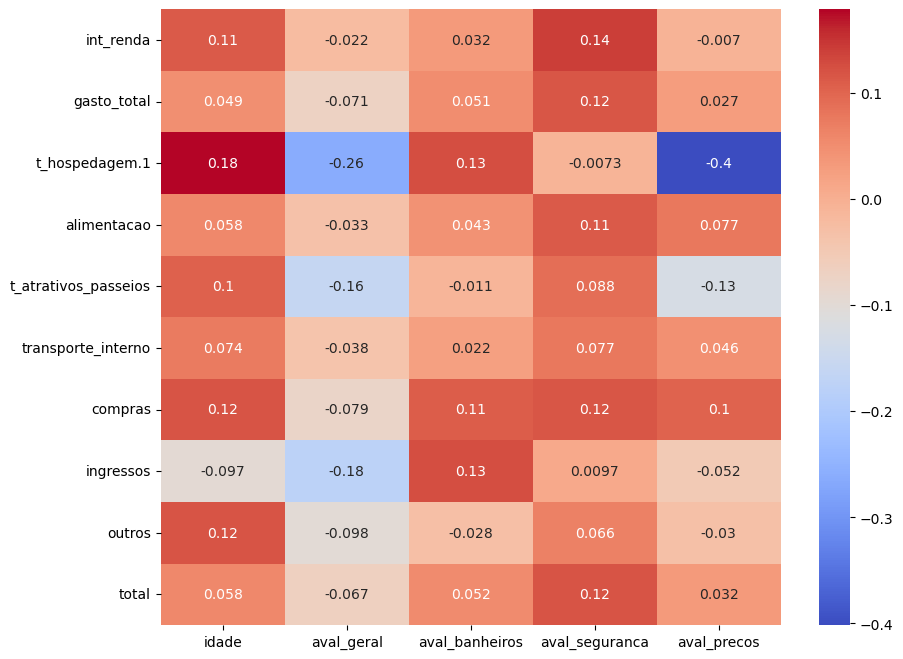

In [14]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(df.corr().loc[financeiro, pessoal], annot=True, cmap='coolwarm', ax=ax)


In [15]:
#Quanto maior os gastos, menor a avaliação geral

In [16]:
renda=df.pivot_table(index=['int_renda', 'genero'], values='aval_geral', aggfunc='mean')

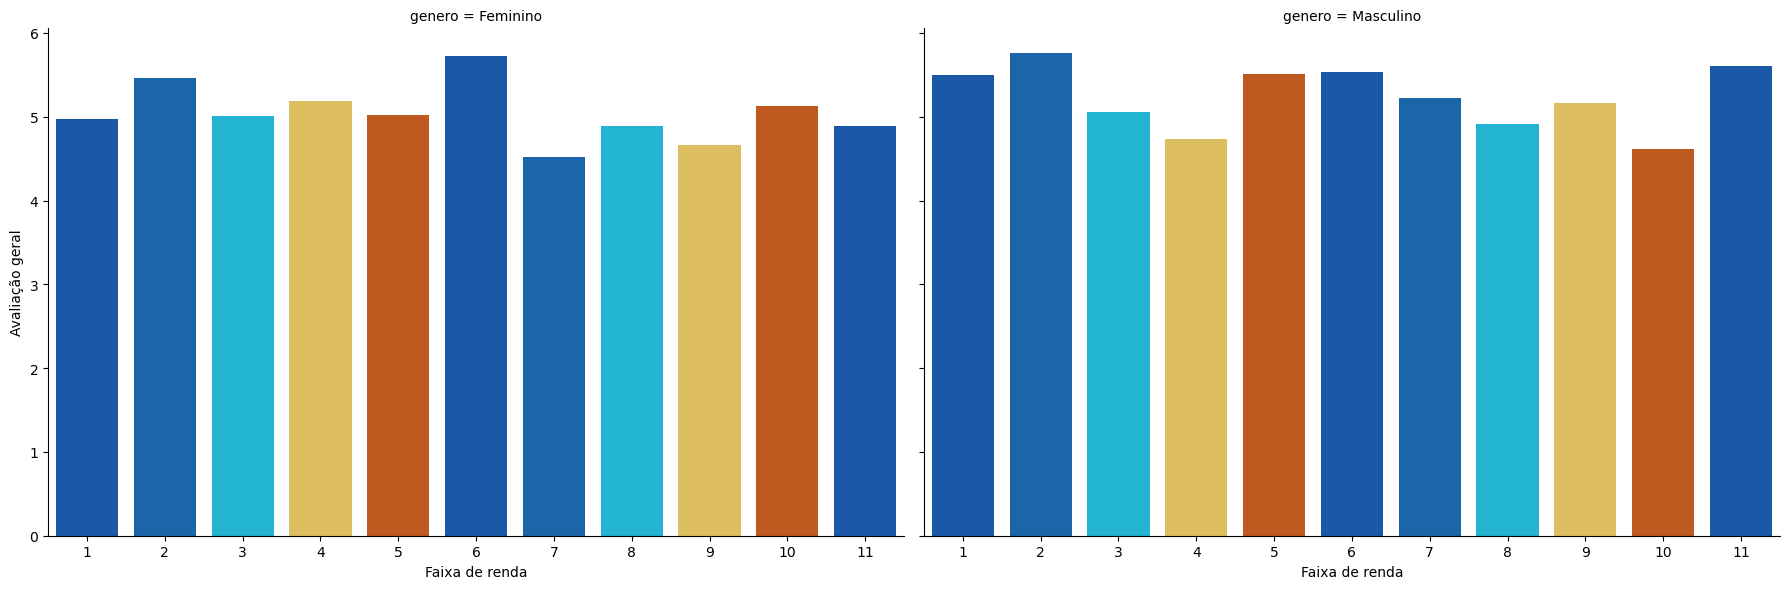

In [17]:

g = sns.catplot(x='int_renda', y='aval_geral', kind='bar', data=df, col='genero', ci=None, palette=my_palette, height=6, aspect=1.5)
g.set_axis_labels('Faixa de renda', 'Avaliação geral')

plt.show()


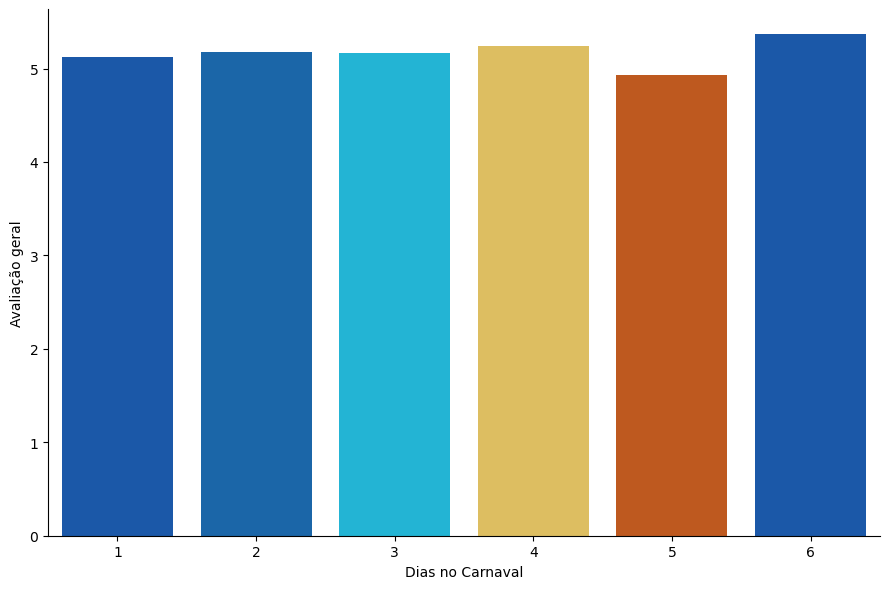

In [18]:
g = sns.catplot(x='dias_carnaval', y='aval_geral', kind='bar', data=df, ci=None, palette=my_palette, height=6, aspect=1.5)
g.set_axis_labels('Dias no Carnaval', 'Avaliação geral')


In [19]:
blocos=df.pivot_table(index='bloco', values='aval_geral', aggfunc='mean')

In [20]:
blocos

,aval_geral
bloco,
Alo Abacaxi,5.290323
Baianas Ozadas,5.108317
Batiza,5.628571
Beiço do Vando,6.558824
Bloco Angola Janga,4.528302
Bloco Despedida de Carnaval,5.860870
Bloco Havayanas Usadas,7.035714
Bloco da Calixto,5.142857
Bloco e o Amo,5.333333


In [21]:
blocos.sort_values(by= 'Unnamed: 0', ascending=False)

KeyError: 'Unnamed: 0'

In [38]:
# Criando a tabela com número de pessoas por estado civil e calculando o percentual do total de cada um
estado_civil = df.groupby('estado_civil', as_index=False).agg({'numero_controle':'nunique'})
estado_civil.columns = ['estado_civil', 'quantidade']
estado_civil['percentual_do_total'] = (estado_civil['quantidade']/estado_civil['quantidade'].sum())*100
estado_civil

,estado_civil,quantidade,percentual_do_total
0,Casado (a),309,19.544592
1,Divorciado (a),72,4.554080
2,Outro,11,0.695762
3,Solteiro (a),1174,74.256799
4,Viuvo (a),15,0.948767


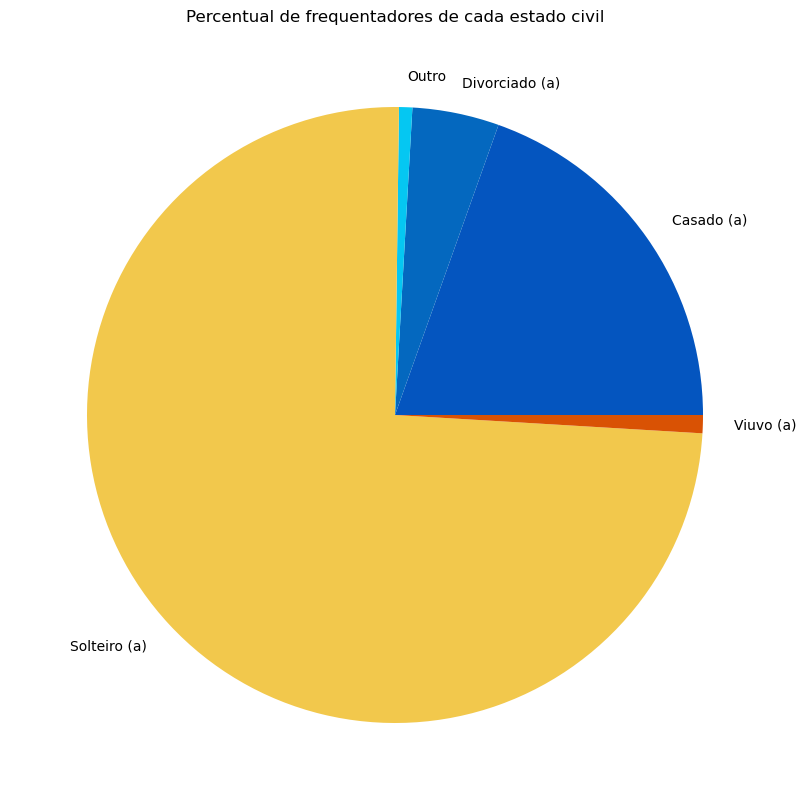

In [40]:
plt.figure(figsize=(12,10))
plt.pie(estado_civil['percentual_do_total'], labels=estado_civil['estado_civil'].unique(), colors=my_palette)
plt.title("Percentual de frequentadores de cada estado civil")
plt.show()

In [59]:
aval_renda = df.groupby('faixa_renda', as_index=False).agg({'aval_geral':'mean'})
aval_renda

,faixa_renda,aval_geral
0,"Acima de 10 salarios (acima de R$ 9540,00)",5.318519
1,"Ate um salario minimo (R$ 954,00 )",5.200000
2,"de 1 a 2 salarios (R$ 954,00 – R$ 1908,00)",5.593625
3,"de 2 a 3 salarios (R$ 1875,00 – R$ 2862,00)",5.028369
4,"de 3 a 4 salarios (R$ 2812,00 – R$ 3816,00)",4.991597
5,"de 4 a 5 salarios (R$ 3749,00 – R$ 4770,00)",5.218085
6,"de 5 a 6 salarios (R$ 4686,00 – R$ 5724,00)",5.627737
7,"de 6 a 7 salarios (R$ 5623,00 – R$ 6678,00)",4.860000
8,"de 7 a 8 salarios (R$ 6560,00 – R$ 7632,00)",4.903226
9,"de 8 a 9 salarios (R$ 7497,00 – R$ 8586,00)",4.897436


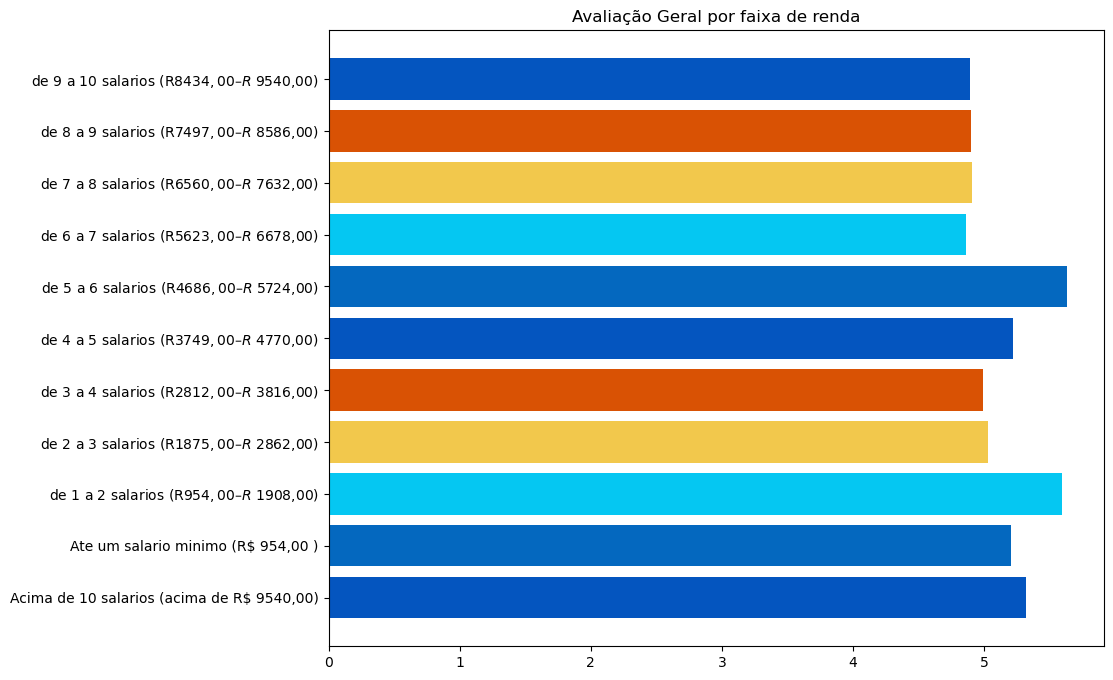

In [60]:
plt.figure(figsize=(10,8))
plt.barh(aval_renda['faixa_renda'], aval_renda['aval_geral'], color=my_palette)
plt.title('Avaliação Geral por faixa de renda')
plt.show()

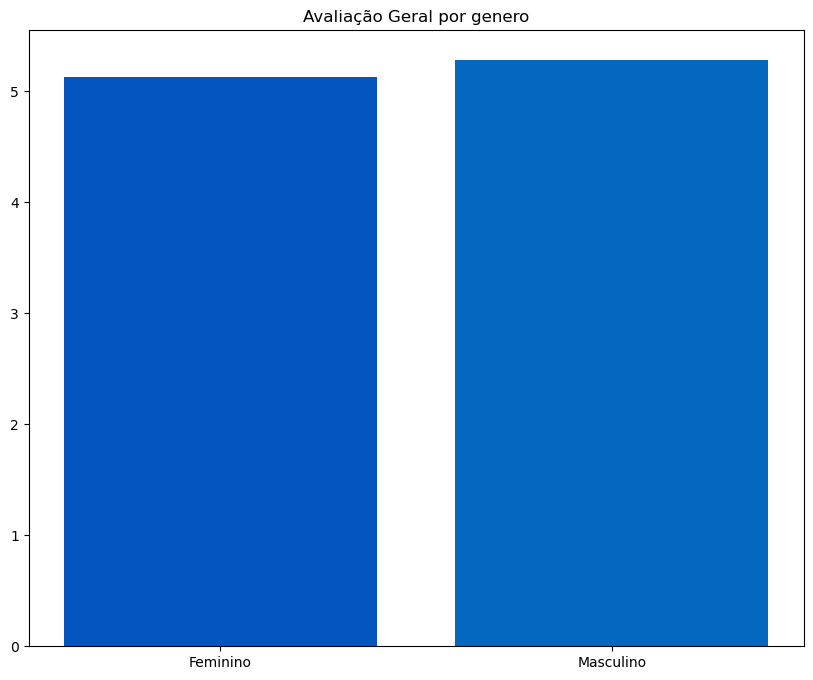

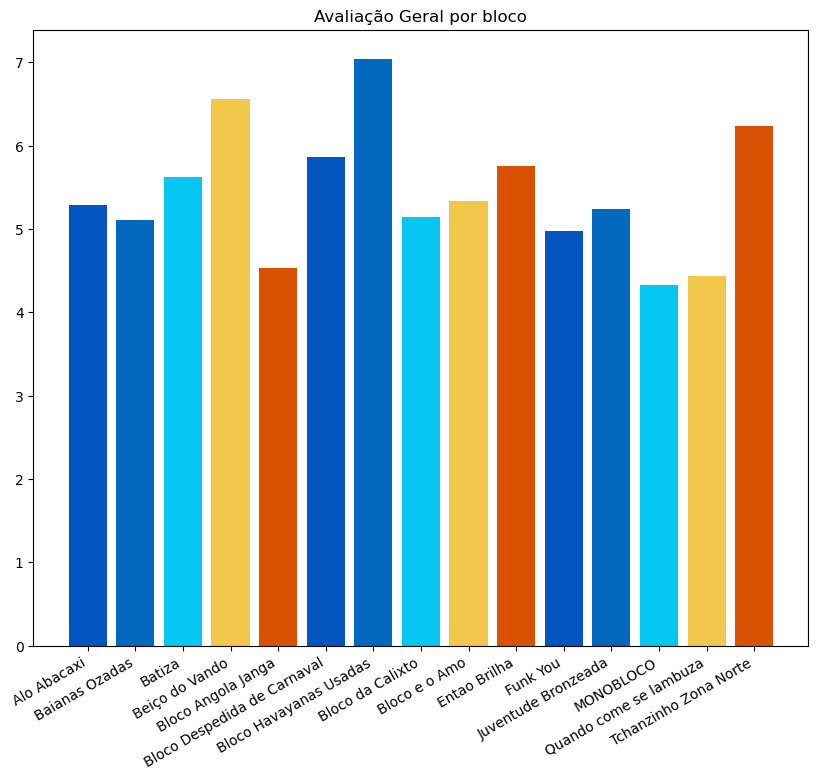

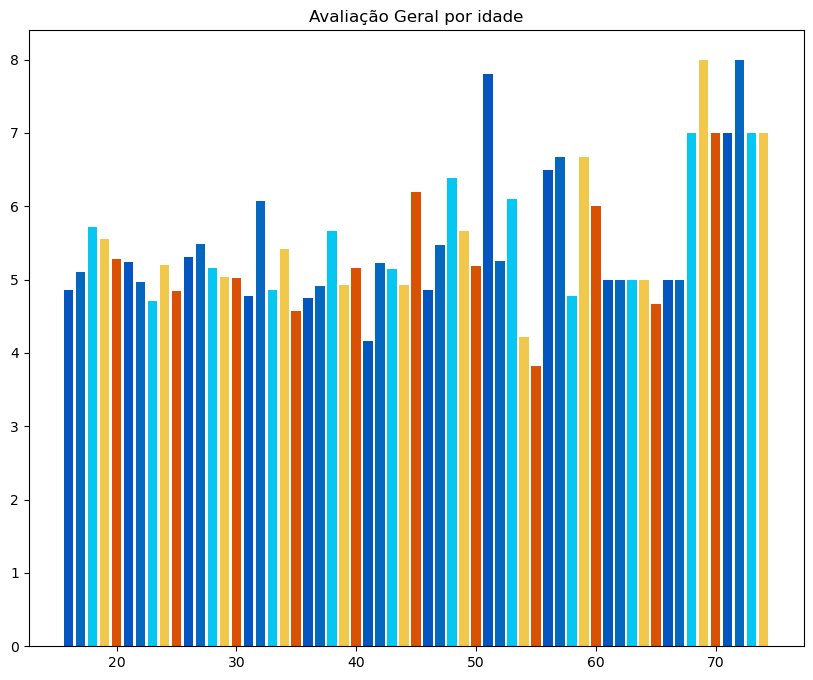

In [71]:
colunas = ['genero', 'bloco', 'idade']
for coluna in colunas:
    df2 = df.groupby(coluna, as_index=False).agg({'aval_geral':'mean'})
    plt.figure(figsize=(10,8))
    plt.bar(df2[coluna], df2['aval_geral'], color=my_palette)
    if coluna == 'bloco':
        plt.xticks(rotation=30, ha='right')
    plt.title('Avaliação Geral por {}'.format(coluna))
    plt.show()

**FATO INTERESSANTE**: A avaliação de pessoas na faixa dos 70 anos parece ser acima da média.

In [74]:
df_3idade = df[df['idade']>65]
print('Média da avaliação geral de pessoas com mais de 65 anos: {:.2f}'.format(df_3idade['aval_geral'].mean()))
print()
print('Média da avaliação geral: {:.2f}'.format(df['aval_geral'].mean()))

Média da avaliação geral de pessoas com mais de 65 anos: 6.47

Média da avaliação geral: 5.20
